In [1]:
import oct2py
from oct2py import octave
import numpy as np
import matplotlib.pyplot as plt
import keras as k
import tensorflow as tf
from keras.models import load_model

Using TensorFlow backend.


In [2]:
location=r'./'

In [3]:
model = load_model(location+r'\keras_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
oc = oct2py.Oct2Py()
oc.push('location', location)
oc.eval("cd(location)")
oc.eval('pkg load image')
oc.eval('pkg load signal')

In [9]:
oc.eval("I=imread([location '/testing/image101.png']);");
oc.eval("image=imcomplement(rgb2gray(I));")
I=oc.pull('I')
gray=oc.pull('image')
oc.eval("[X segmented]=final(image);")
X=oc.pull("X")
seg=oc.pull('segmented')
X=np.asarray(X,dtype=np.float64)
a=[]
for i in range(X.shape[0]):
    a.append(X[i].reshape(32,60).T)
a=np.asarray(a)
a=a.reshape(X.shape[0],60,32,1)
#plt.imshow(a[5,:,:,0], cmap="gray")
preds=model.predict(x = a)
Y=np.argmax(preds,axis=1)

Text(0.5, 0, 'image after preprocessing')

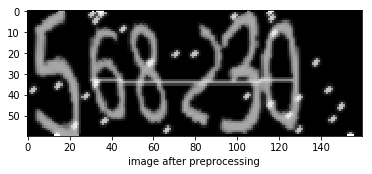

In [10]:
plt.imshow(gray, cmap='gray')
plt.xlabel('image after preprocessing')

Text(0.5, 0, 'image after segmentation')

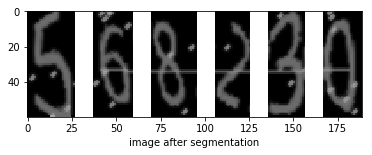

In [11]:
plt.imshow(seg, cmap='gray')
plt.xlabel('image after segmentation')

Text(0.5, 0, '[5 6 8 2 3 0]')

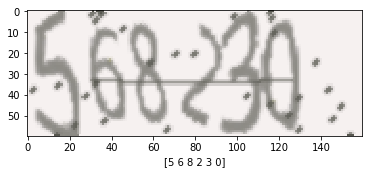

In [12]:
plt.imshow(I)
plt.xlabel('%s' %Y)